In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('All_Extracted_Data_From_PDFs.csv')
private = data.loc[lambda data: data['Topic'] == 'Private Sector Development']

In [3]:
data

,Filename,Date,Year,Amount_in_usd,Country,Country_Code,Income_level,Region,Topic
0,1990_april_24_587321468019152780_conformed-cop...,1990-04-24,1990,8.000000e+07,Cote d'Ivoire,CIV,Lower middle income,Sub-Saharan Africa,Agriculture
1,1990_april_24_668811468165272290_conformed-cop...,1990-04-24,1990,2.500000e+06,St. Lucia,LCA,Upper middle income,Latin America & Caribbean,Water Works
2,1990_april_25_904191468298750561_conformed-cop...,1990-04-25,1990,1.800000e+07,Poland,POL,High income,Europe & Central Asia,Other
3,1990_april_30_410811468040573756_conformed-cop...,1990-04-30,1990,3.290000e+08,Indonesia,IDN,Upper middle income,East Asia & Pacific,Rural Development
4,1990_april_30_725911468042268845_conformed-cop...,1990-04-30,1990,3.500000e+08,Indonesia,IDN,Upper middle income,East Asia & Pacific,Other
...,...,...,...,...,...,...,...,...,...
3034,2017_february_27_227281488910753648_official-d...,2017-02-27,2017,6.778083e+07,Romania,ROU,High income,Europe & Central Asia,Other
3035,2018_august_1_571701533652733733_official-docu...,2018-08-01,2018,5.904770e+07,Romania,ROU,High income,Europe & Central Asia,Other
3036,2018_july_4_554641531246086557_official-docume...,2018-07-04,2018,4.723816e+08,Romania,ROU,High income,Europe & Central Asia,Financial Sector
3037,2017_july_14_224651501534199004_official-docum...,2017-07-14,2017,2.000000e+08,Angola,AGO,Lower middle income,Sub-Saharan Africa,Water Works


In [4]:
yearset = set(data.Year)
codeset = set(data.Country_Code)
countryset = set(data.Country)

In [5]:
private_dict = {'Country':[],'Country_Code':[],'Region':[],'Year':[],'Amount':[]}
private_DF = pd.DataFrame(private_dict)

In [6]:
for country in countryset:
    for year in yearset:
        for i in private.index:
            if private.Country[i] == country and private.Year[i] == year:
                df = pd.DataFrame([[country,private.Country_Code[i],private.Region[i],year,private.Amount_in_usd[i]]],columns = private_DF.columns)
                private_DF = private_DF.append(df)
                

In [7]:
private_DF.reset_index()

,index,Country,Country_Code,Region,Year,Amount
0,0,Philippines,PHL,East Asia & Pacific,1991.0,1.500000e+07
1,0,Philippines,PHL,East Asia & Pacific,1991.0,1.750000e+08
2,0,Philippines,PHL,East Asia & Pacific,1995.0,5.000000e+07
3,0,Philippines,PHL,East Asia & Pacific,1995.0,5.000000e+07
4,0,Philippines,PHL,East Asia & Pacific,1998.0,1.500000e+08
...,...,...,...,...,...,...
266,0,Tunisia,TUN,Middle East & North Africa,2014.0,9.644918e+07
267,0,Antigua and Barbuda,ATG,Latin America & Caribbean,2018.0,2.000000e+06
268,0,Suriname,SUR,Latin America & Caribbean,2019.0,8.230000e+08
269,0,Belarus,BLR,Europe & Central Asia,2016.0,1.000000e+07


In [8]:
amount_sum_dict={'Country_Code':[],'Region':[],'Year':[],'Amount_sum':[]}
amount_sum_DF =pd.DataFrame(amount_sum_dict)

In [9]:
for code in codeset:
    df = private_DF.loc[lambda private_DF: private_DF['Country_Code'] == code]
    region = np.nan
    if len(df.Region) > 0:
        region = list(set(df.Region))[0]
    if len(df.Year)>0:
        for year in df.Year:
            amount_sum = private_DF.loc[(private_DF['Country_Code'] == code) & (private_DF['Year'] == year)]['Amount'].sum()
            df2 = pd.DataFrame([[code,region,year,amount_sum]],columns = amount_sum_DF.columns)
            amount_sum_DF = amount_sum_DF.append(df2)

In [10]:
amount_sum_DF= amount_sum_DF.drop_duplicates(subset ="Amount_sum")

In [11]:
amount_sum_DF = amount_sum_DF.reset_index()
amount_sum_DF

,index,Country_Code,Region,Year,Amount_sum
0,0,IDN,East Asia & Pacific,1993.0,3.070000e+08
1,0,IDN,East Asia & Pacific,1994.0,5.000000e+07
2,0,IDN,East Asia & Pacific,1997.0,5.090000e+07
3,0,IDN,East Asia & Pacific,2003.0,1.710000e+07
4,0,IDN,East Asia & Pacific,2004.0,1.100000e+08
...,...,...,...,...,...
122,0,CHN,East Asia & Pacific,1992.0,8.000000e+06
123,0,CHN,East Asia & Pacific,2006.0,8.633000e+07
124,0,CHN,East Asia & Pacific,2016.0,5.091757e+08
125,0,JOR,Middle East & North Africa,2013.0,7.000000e+07


In [12]:
gdp = pd.read_csv('../gdp_historical_data.csv')
pop = pd.read_csv('../population_historical_data.csv')

In [13]:
amount_sum_DF['-2'] = None
amount_sum_DF['-1'] = None
amount_sum_DF['0'] = None
amount_sum_DF['1'] = None
amount_sum_DF['2'] = None
amount_sum_DF['3'] = None
amount_sum_DF['4'] = None
amount_sum_DF['5'] = None

In [14]:
def compute_WB_data(wbdata,code,year):
    value = np.nan
    for j in wbdata.index:
            if wbdata.iloc[j,1] == code:
                for col in wbdata.columns:
                    if wbdata[col].iloc[3] == year:
                        value = wbdata[col].iloc[j]
                        break
    return value

In [15]:
for k in range(-2,6):
    for i in amount_sum_DF.index:
        code = amount_sum_DF.Country_Code[i]
        year = amount_sum_DF.Year[i] + k
        gdp_per_capita = compute_WB_data(gdp,code,year)/compute_WB_data(pop,code,year)
        amount_sum_DF[str(k)][i] = gdp_per_capita

<ipython-input-15-f2b6b916bdea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amount_sum_DF[str(k)][i] = gdp_per_capita


In [16]:
amount_sum_DF.to_csv('private_gdp.csv')

In [17]:
amount_sum_DF['Loan_weight']=None
amount_sum_DF['Delta'] = None

In [18]:
for i in amount_sum_DF.index:
    g_0 = np.log(amount_sum_DF['0'][i])
    g_5 = np.log(amount_sum_DF['5'][i])
    weight = np.log(amount_sum_DF['Amount_sum'][i]) - g_0
    delta = (g_5-g_0)
    amount_sum_DF['Loan_weight'][i] = weight
    amount_sum_DF['Delta'][i] = delta

<ipython-input-18-2088cfb6070f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amount_sum_DF['Loan_weight'][i] = weight
<ipython-input-18-2088cfb6070f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amount_sum_DF['Delta'][i] = delta


In [19]:
amount_sum_DF = amount_sum_DF.dropna(subset=['Loan_weight',"Delta"])

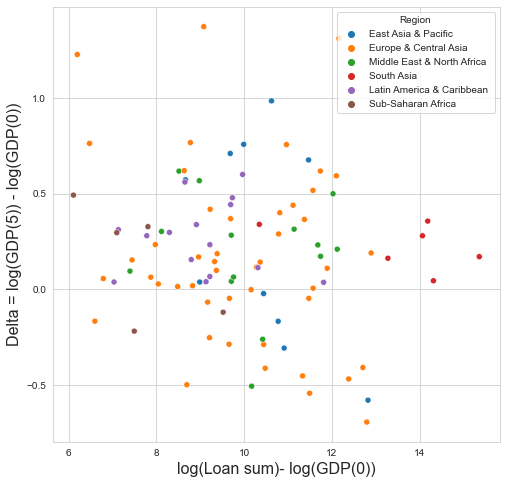

In [22]:
plt.figure(figsize = (8,8))


sns.scatterplot(data = amount_sum_DF, x = "Loan_weight", y="Delta", hue = "Region")
plt.xlabel("log(Loan sum)- log(GDP(0))", fontsize =16)

## place a ylabel
plt.ylabel("Delta = log(GDP(5)) - log(GDP(0))", fontsize = 16)

## type this to show the plot
plt.show()

In [21]:
plt.close()